In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from filt_plot_funcs import *


In [9]:
fs = 200

### DAQ Filter

In [10]:
b, a = signal.iirfilter(N = 4, Wn = 40, btype="lowpass", ftype='butter', fs=fs)
b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")


b = [0.04658291 0.18633163 0.27949744 0.18633163 0.04658291]
a = [ 1.         -0.7820952   0.67997855 -0.1826757   0.03011888]


In [11]:
sos = signal.tf2sos(b, a).astype(dtype=np.float16)

print(f"Unformatted:\n{sos}")
print(f"\nFormatted:", end='')
for section_num in range(np.shape(sos)[0]):
    print("\n")
    for coeff in range(np.shape(sos)[1]):
        print(sos[section_num][coeff], end=", ")

Unformatted:
[[ 0.04657  0.09314  0.04657  1.      -0.3289   0.0646 ]
 [ 1.       2.       1.       1.      -0.4531   0.4663 ]]

Formatted:

0.04657, 0.09314, 0.04657, 1.0, -0.3289, 0.0646, 

1.0, 2.0, 1.0, 1.0, -0.4531, 0.4663, 

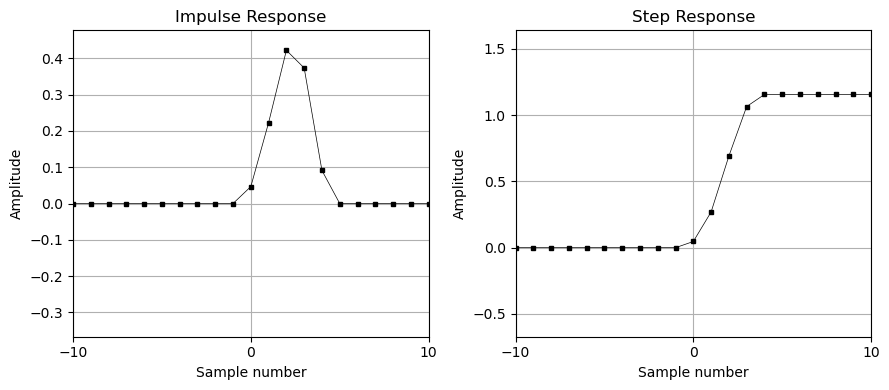

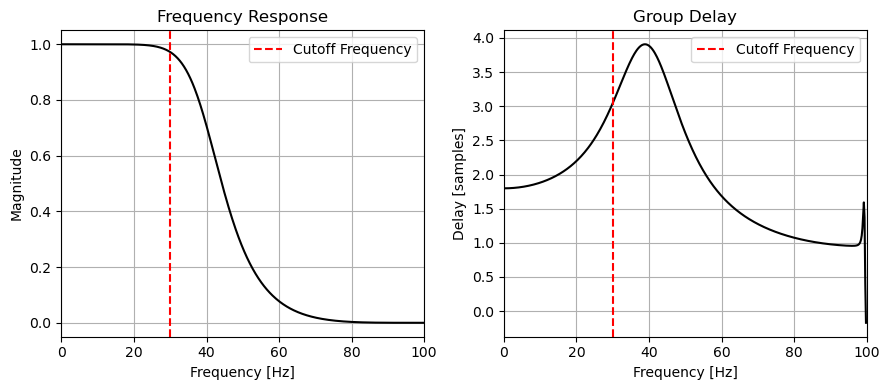

<Figure size 640x480 with 0 Axes>

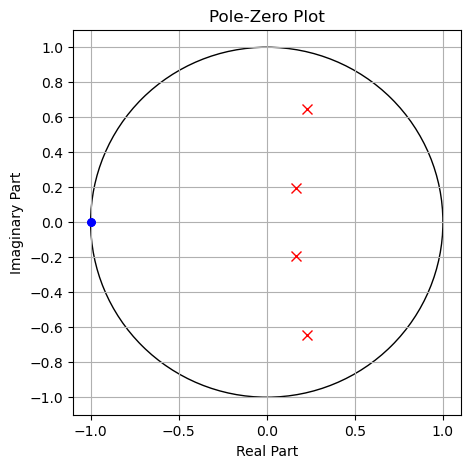

In [12]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)

### DAQ Filter 2

In [13]:
sos1 = np.float32(signal.iirfilter(N=2, Wn = 40, btype="lowpass", ftype='butter', fs=fs, output='sos'))

sos2 = np.float32(signal.iirfilter(N=50, Wn= [59,61], btype="bandstop", ftype="butter", fs=fs, output='sos'))


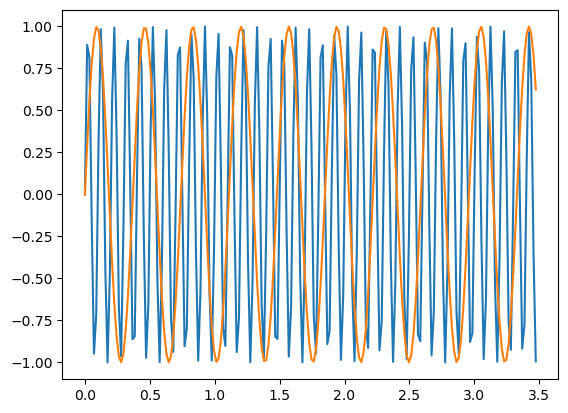

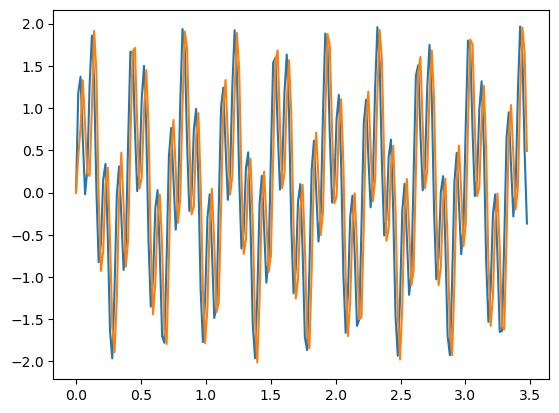

In [14]:
t = np.arange(200) * (np.pi / 180)
x1 = np.sin(2 * np.pi * 10 * t)
x2 = np.sin(2 * np.pi * 60 * t)
plt.plot(t, x1)
plt.plot(t, x2)

plt.figure()
plt.plot(t, x1 + x2)

x3 = signal.sosfilt(sos2, (x1 + x2))
plt.plot(t, x3)


In [ ]:
sos2_2 = np.delete(sos2, 3, 1).flatten()

print("{")
for n in range(len(sos2_2)):
    endOfStr = ",\n" if ((n + 1) < len(sos2_2)) else "\n};"
    print((" " * 4) + f"(float32_t) {sos2_2[n]}", end=endOfStr)
    

In [ ]:
b1, a1 = signal.sos2tf(sos1)
plot_pole_zero(b1, a1)

b2, a2 = signal.sos2tf(np.float32(sos2))
plot_pole_zero(b2, a2)

In [ ]:
z1, p1, k1 = signal.sos2zpk(sos1)
z2, p2, k2 = signal.sos2zpk(np.float32(sos2))

z = np.concatenate([z1, z2])
p = np.concatenate([p1, p2])
k = k1 * k2

b, a = signal.zpk2tf(z, p, k)
b = np.single(b)
a = np.single(a)


In [ ]:
print(np.abs(p))

In [ ]:
plot_freq_resp(b, a, fs=200, in_dB=False)

plot_freq_resp(b, a, fs=200, in_dB=True)
plt.ylim([-70, 5]);

plot_pole_zero(b, a)


In [ ]:
sos = signal.zpk2sos(z, p, k)
sos = np.delete(sos, 3, 1).flatten()

print("{")
for n in range(len(sos)):
    endOfStr = ",\n" if ((n + 1) < len(sos)) else "\n};"
    print((" " * 4) + f"(float32_t) {sos[n]}", end=endOfStr)
    

### QRS LPF

In [ ]:
b, a = signal.iirfilter(N=2, Wn=20, btype='lowpass', ftype='butter', fs=fs)
b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")


In [ ]:
sos = signal.tf2sos(b, a).astype(dtype=np.float16)

print(f"Unformatted:\n{sos}")
print(f"\nFormatted:", end='')
for section_num in range(np.shape(sos)[0]):
    print("\n")
    for coeff in range(np.shape(sos)[1]):
        print(sos[section_num][coeff], end=", ")

In [ ]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)

### QRS HPF

In [ ]:
b, a = signal.iirfilter(N=2, Wn=12, btype='highpass', ftype='butter', fs=fs)
b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")


In [ ]:
sos = signal.tf2sos(b, a).astype(dtype=np.float16)

print(f"Unformatted:\n{sos}")
print(f"\nFormatted:", end='')
for section_num in range(np.shape(sos)[0]):
    print("\n")
    for coeff in range(np.shape(sos)[1]):
        print(sos[section_num][coeff], end=", ")

In [ ]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)

### QRS Derivative Filter

In [ ]:
b = np.array( [1, 2, 0, -2, -1] ) / 8
a = np.zeros(np.shape(b))
a[0] = 1

b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")

In [ ]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)

### QRS MA Filter

In [ ]:
M = 15
b = np.ones(M) / M
a = np.zeros(np.shape(b))
a[0] = 1

b = np.single(b)
a = np.single(a)

print(f"b = {b}\na = {a}")

In [ ]:
plot_domain_t(b, a)

_, [ax1, ax2] = plt.subplots(1, 2, figsize=[9, 4], tight_layout=True)

plot_domain_f(b, a, fs=fs, ax1=ax1, ax2=ax2)

for ax in [ax1, ax2]:
    plt.sca(ax)
    plt.axvline(x=30, linestyle='dashed', color='r', label="Cutoff Frequency")
    plt.legend()
    
plot_pole_zero(b, a)